# Financial Data for an Investment Firm

## Project Scenario

This is a modified version of the Python Project developed in the IBM course named "Python Project for Data Science", part of the Applied Data Science Specialization and the Data Analyst Specialization by IBM, you can visit the link https://www.coursera.org/learn/python-project-for-data-science for more information. This version is intend to be a more complete and a more connected version of the project developed in the course, in order to tell a more compelling story with the data that was collected. The completed notebooks from the course can be found in the folder named *Course-notebooks* inside this repository. You can also click in the next link to access them: https://github.com/UrielASM/Python_Project_for_Data_Science-Course_project/tree/main/Course-notebooks.

For this project scenario, we (the students) assumed the role of a Data Analyst/Data Scientist working for a new startup investment firm that helps customers invest their money in stocks. Our job is to extract financial data, like historical share price and quarterly revenue reports, so that we can identify patterns and trends in the data and determine what companies are better for investment. We used the `yfinance` and the `BeautifulSoup` libraries, in order to collect the data from *Yahoo Finance* and perform Web Scraping from the site *microtrends.net*, respectively. 

After collecting this data you will visualize it in a dashboard, that will help us tell the story behind the data and get to conclusions about the corporations that are better for investments. The companies we will be working with are Tesla, Amazon, Apple, AMD, Netflix and GameStop.

At the end of the analysis, we are about to perform, the next 4 questions will be answered.
1. What stocks are the cheapest?
2. What are the more expensive stocks?
3. Which companies are the most profitable ones?
4. Which are the less profitable companies?

## Modules and Libraries

First, we will install and import the modules and libraries that we need for this project.

In [1]:
!pip install yfinance
!mamba install bs4 -y
!mamba install html5lib -y
!pip install nbformat


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4']

[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Definitions

In this section we define the functions `make_interactive_dashboard` and `convert_to_dataframe` that we will use later. 

On one hand, the `make_interactive_dashboard` function is a modified version of the one provided by IBM, in the course mentioned before, that can handle simultaneous dataframes and can combine the information into a single dashboard. It takes a list of dataframes with stock data (the dataframes must contain *Date* and *Close* columns), a list of dataframes with revenue data (the dataframe must contain *Date* and *Revenue* columns) and a list with the names of the companies that we want to show in the dashboard. The output, it's an interactive dashboard with two main graphs, containing the *Historical Share Price* and the *Historical Revenue* fro the six companies, using data from 2010 to 2023, where you can select the period of time you're interested in.

In [3]:
def make_interactive_dashboard(stocks, revenues, companies_names):
    """
    This is a modified version of the function given by IBM to create the dashboard. 
    This version creates a unique dashboard with the data from all the companies, instead of making individual dashboards for everyone of them, as the original function did.
    The function receive three lists, containing the stock information, the revenues reports and the names of the corportations, respectively.
    """
    
    colors = ['#EF553B',
              '#00CC96',
              '#FF97FF',
              '#FECB52',
              '#636EFA',
              '#19D3F3']
    
    #make 2 subplots
    fig = make_subplots(rows = 2,
                        cols = 1,
                        shared_xaxes = True,
                        subplot_titles = ("Historical Share Price", "Historical Revenue"),
                        vertical_spacing = .03)
    
    # Select the stock data from 2010 onward
    stock_specifics = []
    for stock in stocks:
        stock_specific = stock[stock.Date >= '2009--03-31']
        stock_specifics.append(stock_specific)
    
    # Make the graphs for Share Price and Revenue for every company
    for i in range(len(stocks)):
        
        # Share Price Graph
        fig.add_trace(go.Scatter(x = pd.to_datetime(stock_specifics[i].Date, infer_datetime_format = True), 
                                 y = stock_specifics[i].Close.astype("float"),
                                 legendgroup="group{}".format(i),
                                 name = companies_names[i], 
                                 marker=dict(color=colors[i])),
                      row = 1, col = 1)
        
        # Revenue Graph
        fig.add_trace(go.Scatter(x = pd.to_datetime(revenues[i].Date, infer_datetime_format = True),
                                 y = revenues[i].Revenue.astype("float"),
                                 legendgroup="group{}".format(i),
                                 name = companies_names[i],
                                 marker=dict(color=colors[i]),
                                 showlegend = False),
                      row = 2, col = 1)
    
    # Layout
    fig.update_xaxes(title_text = "Date", row = 2, col = 1)
    fig.update_yaxes(title_text = "Price ($US)", row = 1, col = 1)
    fig.update_yaxes(title_text = "Revenue ($US Millions)", row = 2, col = 1)
    fig.update_annotations(bordercolor='#3366CC', bgcolor='white', font_size= 18)
    
    # Graph titles
    fig.layout.annotations[0].update(x = 0.18, y = 0.95)
    fig.layout.annotations[1].update(x = 0.16, y = 0.43)
    fig.update_layout(showlegend = True,
    height = 1000,
    title = dict(text = "Companies Comparison",
                 font = dict(size = 20)))
    
    fig.show()

On the other hand, the `convert_to_dataframe` function is a function that will help us convert *BeautifulSoup* objects into *Dataframes*, which we'll use to create the dashboard. This function receives a list of *BeautifulSoup* objects, extracts the tables with the revenue reports and returns a list of dataframes containing all the information about these reports.

In [4]:
def convert_to_dataframes(soups):
    for i in range(len(soups)):
        revenue_df = pd.DataFrame(columns=["Date", "Revenue"])

        # First, isolate the body of the table which contains all the information
        # and select the second table, that it's the one we are interested in.
        # Loop through each row and find all the column values for each row
        for row in soups[i].find_all("tbody")[1].find_all('tr'):
            col = row.find_all("td")
            date = col[0].text
            revenue = col[1].text
            # Append the data of each row to the dataframe
            revenue_df = revenue_df.append({"Date":date, "Revenue":revenue}, ignore_index=True)
        
        # Remove the comma and dollar sign from the Revenue column.
        revenue_df["Revenue"] = revenue_df['Revenue'].str.replace(',|\$',"")
        
        # Remove all null or empty strings in the Revenue column
        revenue_df.dropna(inplace=True)
        revenue_df = revenue_df[revenue_df['Revenue'] != ""]
        
        # Finally, append each dataframe to the a list with revenues information
        revenues_information.append(revenue_df)

Here, we also define the three list that we are going to pass to the`make_interactive_dashboard` function later on. The *stocks_information* and *revenues_information* lists are empty, since we haven't collected any data yet. 

In [5]:
companies_names = ["Tesla", "Amazon", "Apple", "AMD", "Netflix", "GameStop"]

# List to collect the desired data
stocks_information = []
revenues_information = []

## Extracting Stock Data Using the *yfinance* Library

`yfinance` is a python library created by *Ran Aroussi*. It's an open-source tool that uses Yahoo's publicly available APIs. It's intended for research and educational purposes. 

We will use the `Ticker` module from this library to create a `Ticker` object, that will allow us to access functions and variables to extract the type of data we need for our analysis. In order to do this, we need to provide the ticker symbol for the stocks we are interested. The ticker symbols for the companies we will be analyzing are as follows:

- Tesla = `TSLA`
- Amazon = `AMZN`
- Apple = `AAPL`
- AMD = `AMD`
- Netflix = `NFLX`
- GameStop = `GME`

You can see more about the `Ticker` model and `yfinance` library here https://aroussi.com/post/python-yahoo-finance.

In [6]:
ticker_symbols = ["TSLA", "AMZN", "AAPL", "AMD", "NFLX", "GME"]

# List of "Ticker" objects for every company
tickers = []

for ticker_symbol in ticker_symbols:
    ticker = yf.Ticker(ticker_symbol)
    tickers.append(ticker)
    print("{}'s ticker object created".format(ticker_symbol))

TSLA's ticker object created
AMZN's ticker object created
AAPL's ticker object created
AMD's ticker object created
NFLX's ticker object created
GME's ticker object created


We can see the length of the `tickers` list and the type of the elements inside that list to check if everything worked out.

In [7]:
print(len(tickers))
print(type(tickers[1]))

6
<class 'yfinance.ticker.Ticker'>


The attribute *info* allows us to extract information from the objects we created above, about the stocks we are interested, as a Python dictionary. Using this attribute we can verify that everything is all right about our objects (created above).

In [8]:
tickers[0].info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its compa

### Extracting Share Price

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the `history()` method we can get the share price of the stock over a certain *period of time*. Using the `period` parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max. In our case, we will use the *max* option for the period of time.

In [9]:
# Get the share prices and store it, for every company, in the stock_information list
for ticker in tickers:
    stock_information = ticker.history(period = "max")
    stocks_information.append(stock_information)

The data is returned in the he format of a Pandas DataFrame. With the *Date* as the index and the share *Open*, *High*, *Low*, *Close*, *Volume*, *Dividends* and *Stock Splits* are given for each day. We can print out the length of the `stocks_information` list and the type of the elements inside it to verify that everything is fine.

In [10]:
print(len(stocks_information))
print(type(stocks_information[0]))

6
<class 'pandas.core.frame.DataFrame'>


We need to reset the index of these DataFrames. We can do that with the `reset_index` function. We'll also set the `inplace` parameter to **True** so the change takes place to the DataFrame itself.

In [11]:
for stock_information in stocks_information:
    stock_information.reset_index(inplace=True)

Let's take a look to the data collected in the `stocks_information` list and check that everything seems to be in order.

In [12]:
stocks_information[0].head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
stocks_information[0].tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3260,2023-06-12 00:00:00-04:00,247.940002,250.970001,244.589996,249.830002,150337900,0.0,0.0
3261,2023-06-13 00:00:00-04:00,253.509995,259.679993,251.339996,258.709991,162384300,0.0,0.0
3262,2023-06-14 00:00:00-04:00,260.170013,261.570007,250.500000,256.790009,170575500,0.0,0.0
3263,2023-06-15 00:00:00-04:00,248.399994,258.950012,247.289993,255.899994,160171200,0.0,0.0
3264,2023-06-16 00:00:00-04:00,258.920013,263.600006,257.209991,260.540009,167563700,0.0,0.0


## Extracting Revenue Data Using Webscraping

In this section, we will extract the revenue data from https://www.macrotrends.net/. *MacroTrends* is a research platform that enables users to screen and research stocks, market indices, commodities, precious metals, oil, gas, global metrics, etc. In our case, we will use this site to collect the quarterly revenue reports, these reports are given in the links bellow.

In [13]:
urls = ["https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue",
        "https://www.macrotrends.net/stocks/charts/AMZN/amazon/revenue",
        "https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue",
        "https://www.macrotrends.net/stocks/charts/AMD/amd/revenue",
        "https://www.macrotrends.net/stocks/charts/NFLX/netflix/revenue",
        "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"]

First, we use the `request` library to download the webpages in the URLs given before. 

In [16]:
# List to store the data obtain after the get request
requests_data = []

for url in urls:
    request_data = requests.get(url).text
    requests_data.append(request_data)


Let's check if everything worked out.

In [17]:
print(len(requests_data))
print(type(requests_data[0]))
#print(requests_data[1])

6
<class 'str'>


Next we must parse the text into `html` using `beautiful_soup`.



In [18]:
# List to store the BeautifulSoup object
soups =[]

for request_data in requests_data:
    soup = BeautifulSoup(request_data, 'html.parser')
    soups.append(soup)


Now, let's verify that everything is fine and turned out as expected.

In [19]:
print(len(soups))
print(type(soups[0]))

6
<class 'bs4.BeautifulSoup'>


Finally, we use `convert_to_dataframes` function in order to convert the BeautifulSoup objects we just created into Dataframes

In [20]:
convert_to_dataframes(soups)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  


and check that everything is in order.

In [21]:
revenues_information[0].head()

,Date,Revenue
0,2023-03-31,23329
1,2022-12-31,24318
2,2022-09-30,21454
3,2022-06-30,16934
4,2022-03-31,18756


In [22]:
revenues_information[0].tail()

,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


## Dashboard

After we collected our data from *Yahoo Finance* and from the site *microtrends.net*, we are now ready to create the dashboard that will help us compare the *Historical Share Price* and the *Revenue* of all six companies we are interested and come to conclusions about this data, that will help customers make informed decision about which companies are better for investment.

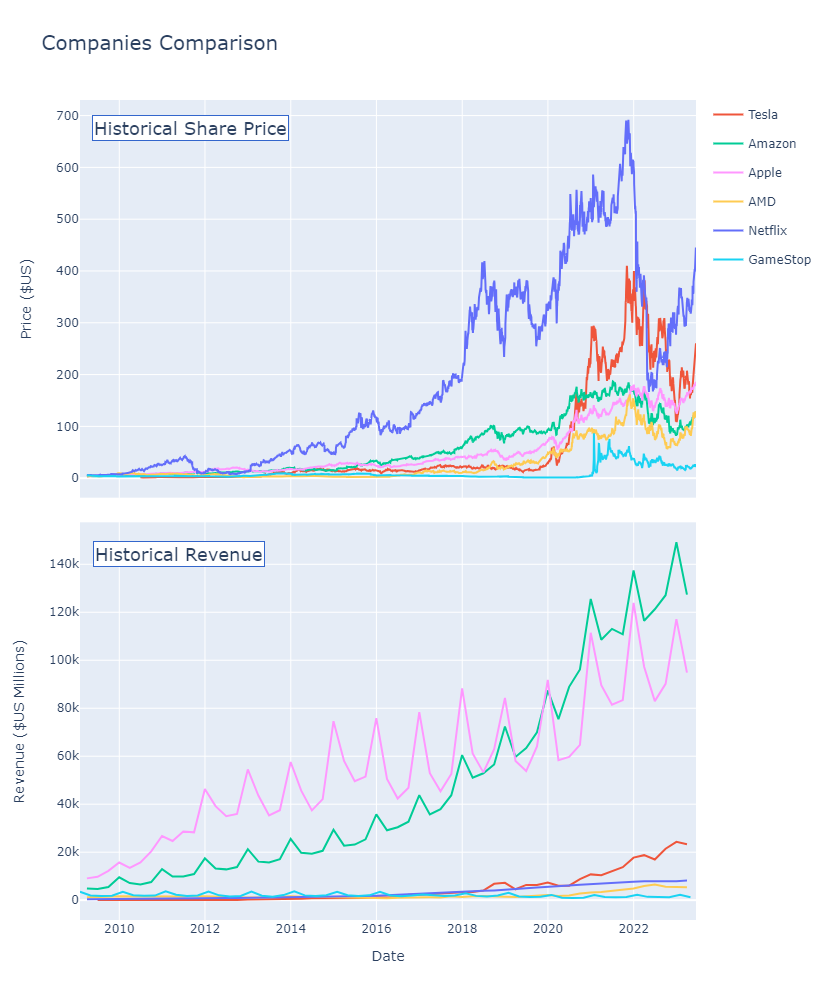

In [34]:
make_interactive_dashboard(stocks_information, revenues_information, companies_names)

## Results

Now, we are able to answer the questions posed at the beginning, extract insights from the data gathered and their implications.

### Questions

1. What stocks are the cheapest?

> As you can see in the dashboard, the company with the cheapest stocks is GameStop. The price of each share was around \\$26 USD in June 2023 and it has never been above \\$80 USD in the last two years.

2. What are the more expensive stocks?

> On the other hand, the company with the more expensive stocks, by far, is Netflix. The price of each share was around \\$445 USD, having its highest point at \\$691 USD and its lowest point at \\$167 USD in the last two years.

3. Which companies are the most profitable ones?

> As you can see in the dashboard, the companies with greater income are, by far, Amazon & Apple. The revenue of the first quarter of 2023, for these companies, are \\$127358 millions (USD) and \\$94836 millions (USD), respectively.

4. Which are the less profitable companies?

> On the other hand, the companies with lower income are GameStop, AMD & Netflix. The revenue of the first quarter of 2023, for these companies, are \\$2226 millions(USD), \\$5353 millions (USD) and \\$5353 millions (USD), respectively. All of them below \\$10000 millions (USD)

### Insights

As you can see on the graphs above:

1. Both Tesla and Netflix share price oscillate too much through the months, while Apple, Amazon, AMD and GameStop stocks are more stable.
2. Both Apple and Amazon have had significant growth in their revenues through the years, while GameStop's, AMD's and Netflix's got a bit stuck growing too little when compared with Apple's and Amazon's.

### Conclusions


1. Since Game Stop have the cheapest stocks, invest in its shares would be a good option for people with less purchasing power that do not have a lot of money to invest. 
2. On the other hand, Netflix stocks are the most expensive ones and have a growing tendency. This could be a interesting investment for someone with more capital that has interest in sale them in the future and recover what they invested.
3. Considering that Amazon and Apple are the most profitable companies with a growing trend in their profits among the rest, investing in them could lead to have a significant gain of money in a short period of time with a minimum investment due to their low share prices.
4. On account of the fact that Tesla and Netflix share prices overly oscillate, invest in these companies is riskier than invest in one of the other six, because their prices could depreciate a lot but also could increase a lot.
5. On the other hand, Apple, Amazon, AMD and GameStop are safer investments, since their stocks prices are more stable.